In [9]:
## Import libraries & data

In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df_insurance = pd.read_csv('InputData/insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,zip_code,charges
0,19,female,27.900,0,yes,40216,16884.92400
1,18,male,33.770,1,no,40218,1725.55230
2,28,male,33.000,3,no,40218,4449.46200
3,33,male,22.705,0,no,40202,21984.47061
4,32,male,28.880,0,no,40202,3866.85520


In [12]:
df_headcount = pd.read_csv('InputData/region_headcount.csv')
df_headcount.head()

,region,ZipCode,MenCount,FemalCount,ChildCount
0,southwest,40216,2020,1850,2000
1,southeast,40218,1300,1200,1550
2,northwest,40202,1700,1750,1905
3,northeast,40245,2000,1850,2210


In [13]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   zip_code  1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [14]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
zip_code    0
charges     0
dtype: int64

In [15]:
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
zip_code,1338.0,40220.165919,15.335177,40202.0000,40216.00000,40218.000,40218.000000,40245.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [36]:
df = pd.merge(df_insurance, df_headcount, left_on= 'zip_code', right_on='ZipCode', how='left').drop('ZipCode', axis=1)
df.head()

,age,sex,bmi,children,smoker,zip_code,charges,region,MenCount,FemalCount,ChildCount
0,19,female,27.900,0,yes,40216,16884.92400,southwest,2020,1850,2000
1,18,male,33.770,1,no,40218,1725.55230,southeast,1300,1200,1550
2,28,male,33.000,3,no,40218,4449.46200,southeast,1300,1200,1550
3,33,male,22.705,0,no,40202,21984.47061,northwest,1700,1750,1905
4,32,male,28.880,0,no,40202,3866.85520,northwest,1700,1750,1905


In [139]:
 ## Exploratory Analysis

In [37]:
def func(row):
    if row['age'] < 21:
        return 'Children'
    elif row['age'] >21 and row['age']< 61:
        return 'Adult' 
    else:
        return 'senier citi'

df['age_group'] = df.apply(func, axis=1)

In [38]:
cols_w_diff_categories= ['sex', 'children', 'smoker', 'region']
count_of_categories= ['sex', 'region','age_group', ]
cols_w_values= ['age', 'bmi', 'charges']


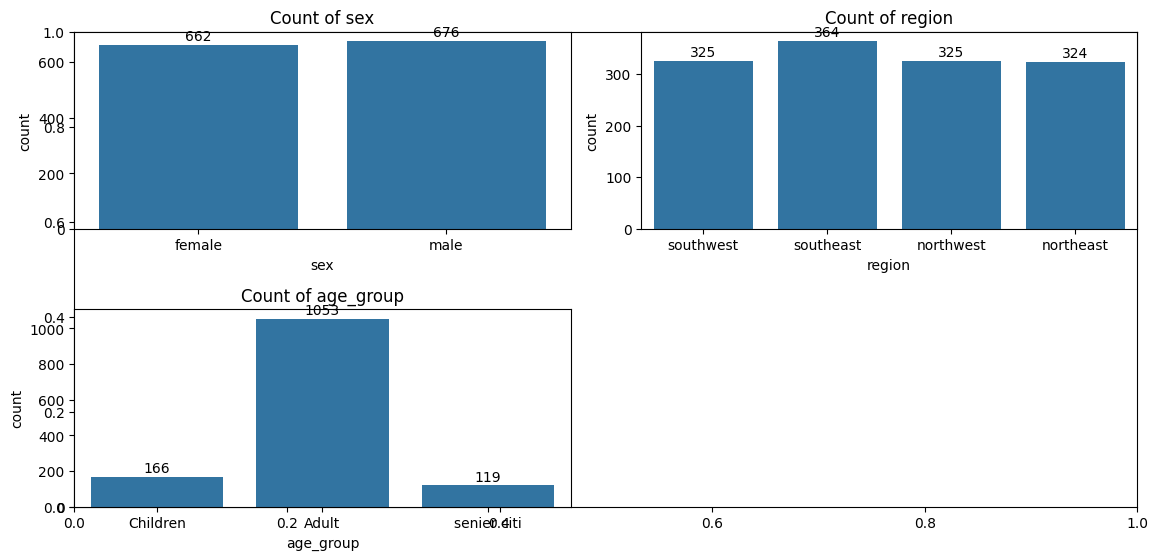

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(count_of_categories,1):
    
    ax = plt.subplot(2, 2, i)
    
    sns.countplot(x=df[col].astype('object'), ax=ax)
    plt.title(f'Count of {col}')
    
    for c in ax.containers:
        ax.bar_label(c, fmt='%d', padding=1)
        
    # ax.remove() 

plt.tight_layout()
plt.show()

# Explicitly close the figure to remove overlapping axes
plt.close(fig)

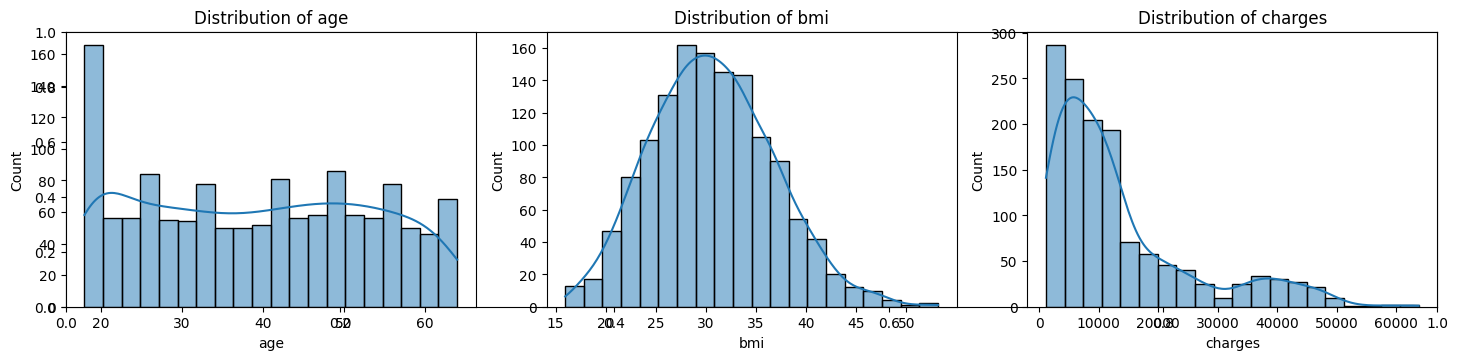

In [40]:
### number of unique elements > 6
fig, ax = plt.subplots(figsize=(15, 4))

for i, col in enumerate(cols_w_values, 1):
    plt.subplot(1, 3, i)
    sns.histplot(x=df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [41]:
### For plotting purposes, divide the data into two sets
# number of unique elements <= 6
cols_smaller_than_6 = [col for col in df.columns if df[col].nunique() <= 6]
print(cols_smaller_than_6)

# number of unique elements > 6
cols_greater_than_6 = [col for col in df.columns if df[col].nunique() > 6]
print(cols_greater_than_6)

['sex', 'children', 'smoker', 'zip_code', 'region', 'MenCount', 'FemalCount', 'ChildCount', 'age_group']
['age', 'bmi', 'charges']


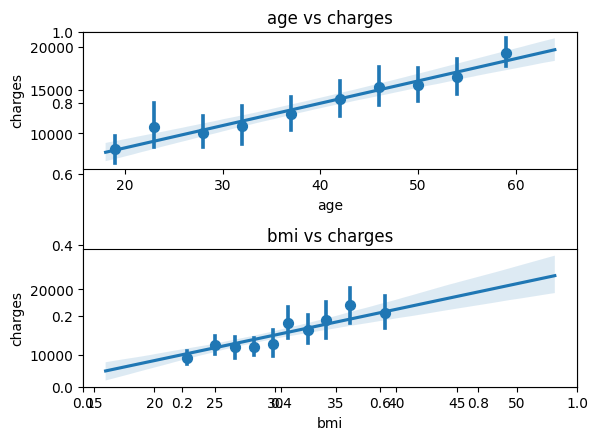

In [42]:
### number of unique elements > 6
# box plot of 'charges' & other variables
fig, ax = plt.subplots()

charges_vs_categories = [col for col in cols_w_values if col != 'charges']

for i, col in enumerate(charges_vs_categories, 1):
    plt.subplot(2, 1, i)

    ax = sns.regplot(data=df, x=df[col], y='charges', x_bins=10)
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [166]:
## Multi- Variate Analysis

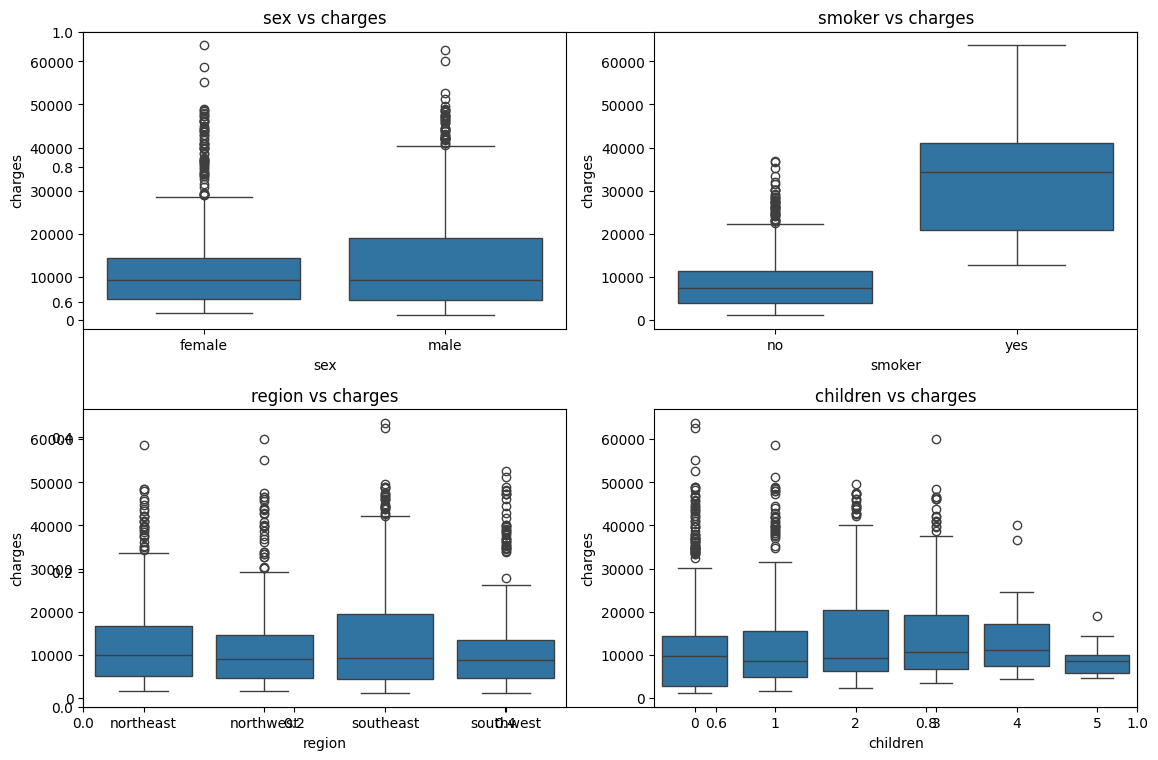

In [56]:
### number of unique elements <= 4
# box plot of 'charges' & other variables
fig, ax = plt.subplots(figsize=(12, 8))

cols_smaller_than_6= ['sex','smoker','region','children']
for i, col in enumerate(cols_smaller_than_6, 1):
    plt.subplot(2, 2,i)
    
    ax = sns.boxplot(data=df, x=df[col].astype('category'), y='charges')
    plt.title(f'{col} vs charges')

plt.tight_layout()
plt.show()

In [57]:
bins_2 = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000]
labels_2 = ['1k-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k',]

df['charges_group'] = pd.cut(df.charges, bins_2, labels=labels_2, include_lowest=True)
df.head()

,age,sex,bmi,children,smoker,zip_code,charges,region,MenCount,FemalCount,ChildCount,age_group,charges_group
0,19,female,27.900,0,yes,40216,16884.92400,southwest,2020,1850,2000,Children,10k-20k
1,18,male,33.770,1,no,40218,1725.55230,southeast,1300,1200,1550,Children,1k-5k
2,28,male,33.000,3,no,40218,4449.46200,southeast,1300,1200,1550,Adult,1k-5k
3,33,male,22.705,0,no,40202,21984.47061,northwest,1700,1750,1905,Adult,20k-30k
4,32,male,28.880,0,no,40202,3866.85520,northwest,1700,1750,1905,Adult,1k-5k


In [58]:

sex_smoker_charges = df.pivot_table(index='sex', columns='smoker', values='charges')
sex_smoker_charges

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975


In [59]:
sex_agegroup_charges = df.pivot_table(index='sex', columns='age_group', values='charges')
sex_agegroup_charges

age_group,Adult,Children,senier citi
sex,,,
female,12691.493682,7941.884254,17679.179208
male,14378.957322,9431.248142,16753.391830


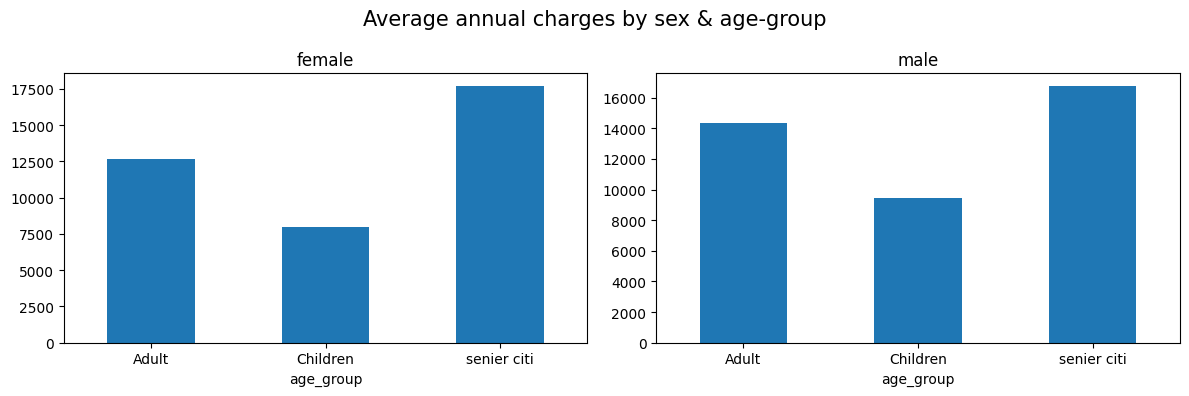

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for ax, agegroup in zip(ax, sex_agegroup_charges.index):
    sex_agegroup_charges.xs(agegroup).plot(kind='bar', rot=0, ax=ax,)
    ax.set_title(agegroup)

plt.suptitle('Average annual charges by sex & age-group', fontsize=15)
plt.tight_layout()